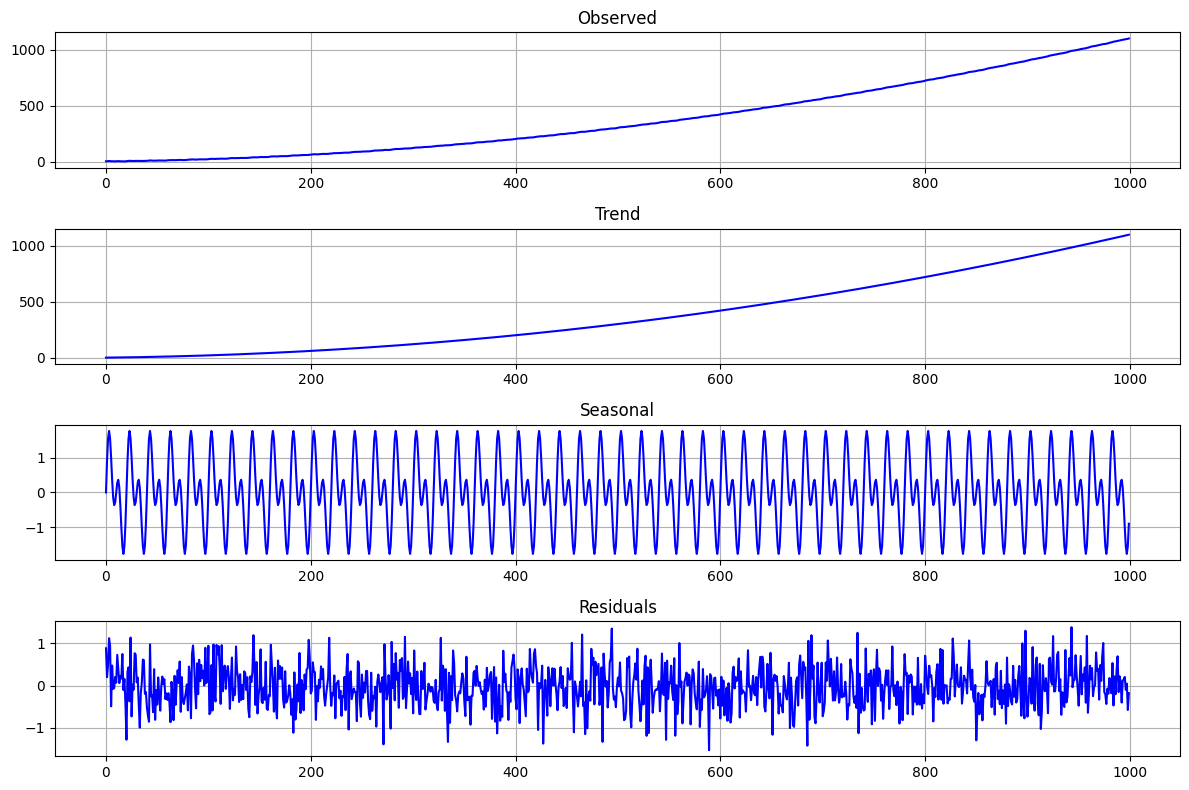

In [1]:
#ex1

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

N = 1000
t = np.arange(N)

# Componenta Trend - ecuație de gradul 2
a, b, c = 0.001, 0.1, 2
trend = a * t**2 + b * t + c

# Componenta Sezon - două frecvențe
freq1, freq2 = 0.05, 0.1
season = np.sin(2 * np.pi * freq1 * t) + np.sin(2 * np.pi * freq2 * t)

# Generam componenta resziduala(residuals)
residuals = np.random.normal(loc=0.0, scale=0.5, size=N)

# Combinam componentele pentru a crea seria de timp
time_series = trend + season + residuals

# Plotam fiecare componenta
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(t, time_series, label='Observed', color='blue')
plt.title('Observed')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(t, trend, label='Trend', color='blue')
plt.title('Trend')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(t, season, label='Seasonal', color='blue')
plt.title('Seasonal')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(t, residuals, label='Residuals', color='blue')
plt.title('Residuals')
plt.grid(True)

plt.tight_layout()

plt.show()


In [2]:
#ex2

import numpy as np
import pandas as pd
from scipy.optimize import minimize

np.random.seed(0)

# Generam o serie de timp aleatoare
N = 1000
t = np.arange(N)
data = np.random.randn(N)

# Folosim pandas si converim seria de timp la una pandas
time_series = pd.Series(data, index=t)

# Definim o functie care sa calculeze medierea exponentiala
def exponential_moving_average(series, alpha):
    return series.ewm(alpha=alpha).mean()

# Definim o functie care sa calculeze MSE dintre EMA si seria de timp initiala
def mse_alpha(alpha, series):
    ema = exponential_moving_average(series, alpha)
    mse = ((ema - series) ** 2).mean()
    return mse

# Valoarea lui alpha initiala
alpha_initial = 0.1

# Optimizam alpha pentru a minimiza MSE-ul
result = minimize(mse_alpha, alpha_initial, args=(time_series,), bounds=[(0,1)])

# Calculam EMA-ul optimizat cu alpha-ul optim gasit
alpha_optimal = result.x[0]
ema_optimal = exponential_moving_average(time_series, alpha_optimal)

# Afisam valoarea alpha optima
print(f"Optimal alpha: {alpha_optimal}")

# Returnam EMA optim
ema_optimal

Optimal alpha: 1.0


0      1.764052
1      0.400157
2      0.978738
3      2.240893
4      1.867558
         ...   
995    0.412871
996   -0.198399
997    0.094192
998   -1.147611
999   -0.358114
Length: 1000, dtype: float64

In [3]:
#ex3

import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess

np.random.seed(0)

# Definim parametrii pentru modelul MA
# Coeficienții sunt pentru termenii de eroare întârziați, primul coeficient corespunde întârzierii 0, care este 1 prin definiție.
# Aici definim un model MA de ordinul q=3
q = 3
ma_coefficients = np.zeros(q + 1)
ma_coefficients[0] = 1  # Acesta este coeficientul pentru întârziere 0
ma_coefficients[-1] = 1  # Acesta este coeficientul pentru termenul MA la întârziere q

# Generăm procesul MA
ma_model = ArmaProcess(ma=ma_coefficients)
ma_process = ma_model.generate_sample(nsample=1000)

# Convertim la Series pandas pentru consistență
ma_series = pd.Series(ma_process)

# Afișăm primele câteva elemente ale seriei MA
ma_series.head()

0    1.764052
1    0.400157
2    0.978738
3    4.004946
4    2.267715
dtype: float64